# Gaia DR3 Hackathon @ MIT
## Coordinate Transformations Tutorial


##### This is a quick tutorial to teach you how to use tools like astropy to transform between different astronomical coordinate systems! 

### Astronomical Coordinate Systems

In astronomy, we use different coordinate systems to represent the positions and velocities of stars and other astronomical objects on the sky. The images below show the sky as seen by Gaia in equatorial (left) and Galactic (right) coordinates.

In [2]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='figures/milkyway_2020_4k_print.jpeg'></td><td><img src='figures/starmap_2020_4k_gal_print.jpeg'></td></tr></table>"))
print('Credit: NASA https://svs.gsfc.nasa.gov/4851')

,


Credit: NASA https://svs.gsfc.nasa.gov/4851


<b>Equatorial coordinates:</b> The equatorial coordinate system is defind by how we view the sky from Earth. It is essentially an extension of the longitude and latitude system we use to measure positions on Earth. Each position on the sky is defined by a longitude (referred to as <b>right ascension</b> or RA or $\alpha$) and a lattitude (<b>declination</b> or Dec or $\delta$). For more details, see image below and check out <a href="https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/">this article.</a> Positions of stars are measured in equatorial coordinates and are generally reported in units of degrees, acrminutes, or arcseconds.

<b>Galactic coordinates:</b> Galactic coordinates are defined so that the Galactic plane of the Milky Way lies along the equator. Each position in Galactic coordinates is defind by a longitude (<b>l</b>) and a latitude (<b>b</b>). As for the equatorial coordinate system, the origin of the Galactic coordinate system is our solar system.

<b>Galactocentric cartesian coordinates:</b> Sometimes it is also useful to convert longitudes and latitudes to cartesian cordinates (i.e. $x, y, z$) with an origin at the center of the Milky Way. This can be especially helpful when working with simulations.

<b><i>Note</i></b>: Sometimes RA is measured in hours, minutes, and seconds instead of degrees. To convert between these units, this is a handy website: http://www.astrouw.edu.pl/~jskowron/ra-dec/

<div>
<img src="figures/ra_dec.jpg" width="400"/>
</div>
Credit: Tom Ruen / CC BY-SA 3.0

### Velocities:

In addition to positions, we can convert velocities between different astronomical coordinate systems. The three velocity components that we measure in equatorial coordinates are two proper motions (movement along the sky) and radial velocity (movement towards or away from us). (See image.)

<b>Proper motion:</b> Proper motions are measured by comparing precise position measurements across time (e.g. small changes in RA and Dec). In equatorial coordinates, they are often referred to as pmra, pmdec or $\mu_{\rm \alpha}$, $\mu_{\rm \delta}$ and are generally measured in units of milliarcseconds per year, or $\mathrm{mas}\ \mathrm{yr}^{-1}$. <i>Note: $\mu_{\rm \alpha}$ values are weighted by $\cos \delta$ - this correction is already applied in the Gaia data.</i>

<b>Radial velocity:</b> Radial velocities are measured from spetroscopy, by calculating the red or blueshift of a spectrum due to movement of the emitting object towards or away from us. Radial velocity is usually referred to as $v_{\rm r}$ and is often measured in units of kilometers per second or $\mathrm{km}\ \mathrm{s}^{-1}$.


<div>
<img src="figures/proper_motion.jpeg" width="400"/>
</div>

## Transformations

The python package <a href="https://www.astropy.org/">astropy</a> is a great tool for transforming between astronomical coordinate systems. Their documentation can be found <a href="https://docs.astropy.org/en/stable/coordinates/index.html">here.</a>

### Import packages

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactocentric

import gala.coordinates as gc
from gala.coordinates import reflex_correct

### Example 1: Defining a coordinate system

In [4]:
# From https://docs.astropy.org/en/stable/coordinates/index.html

c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs') # Use the ICRS frame when working in equatorial coordinates (Ra, Dec)
# Read more about ICRS here: https://en.wikipedia.org/wiki/International_Celestial_Reference_System_and_Frame

# The initializer for SkyCoord is very flexible and supports inputs provided in a number of convenient formats. The following ways of initializing a coordinate are all equivalent to the above:
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

In [5]:
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

In [6]:
# Print RA and Dec in different units
print('RA, Dec = %.1f deg, %.1f deg' %(c.ra.deg, c.dec.deg))
print('RA, Dec = %.1f h, %.1f arcmin' %(c.ra.hour, c.dec.arcminute))

RA, Dec = 10.6 deg, 41.2 deg
RA, Dec = 0.7 h, 2472.0 arcmin


In [7]:
# If known, you can also include a distance.
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, distance=100*u.kpc, frame='icrs')

#### Problem 1: Adapt the code above to define a Galactic coordinate system, using frame='galactic.' And print out l and b.

In [ ]:
c_gal = SkyCoord( # complete

### Example 2: Converting position coordinates

In [8]:
# Define ICRS frame
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

# Convert to Galactic coordinates
c_gal = c.galactic

c_gal

<SkyCoord (Galactic): (l, b) in deg
    (121.12334339, -21.6403587)>

#### Problem 2: Convert to another coordinate system of your choice. The built-in astropy coordinate frames can be found <a href="https://docs.astropy.org/en/stable/coordinates/index.html#built-in-frame-classes">here.</a>

<b>Note:</b> Some coordinate systems may require 3D positions. In that case, specify a distance in your ICRS coordinates.

In [ ]:
c_new_frame = # complete

### Example 3: Galactocentric coordinates

Defining a Galactocentric coordinate system requires specifying certiain parameters about the position and velocity of the sun relative to the Galactic center. You can read more about the coordinate system as implemented in astropy <a href="https://docs.astropy.org/en/stable/coordinates/galactocentric.html">here.</a>

In [9]:
# Print default Galactocentric coordinate paramters

# galcen_coord: ra, dec of Galactic center in ICRS
# galcen_distance: distance from the Sun to the Galactic center
# galcen_v_sun: velocity of the Sun relative to the Galactic center
# z_sun: distance of Sun out of the Galactic plane
# roll: angle defining the orientation of the Galactic plane

_ = coord.galactocentric_frame_defaults.set('v4.0') # Set default parameters to astropy v4.0 for consistency

Galactocentric()

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

#### Problem 3: Define an ICRS coordinate system and convert to Galactocentric coordinates using the default astropy parameters.

In [ ]:
c_icrs = SkyCoords( # complete
c_galacto = # complete

### Example 4: Converting velocity coordinates

In [10]:
# Include raidal velocity and proper motion
c = SkyCoord(1*u.deg, 2*u.deg, distance=100*u.kpc, radial_velocity=20*u.km/u.s, pm_ra_cosdec=.2*u.mas/u.yr, pm_dec=.1*u.mas/u.yr)

c

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (1., 2., 100.)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.2, 0.1, 20.)>

#### Problem 4: Convert your coordinate system including positions and velocities to Galactic and Galactocentric coordinates and print out the velocity coordinates.

In [ ]:
c_gal = # complete
c_galacto = # complete

print('Galactic velocities = ' # complete
print('Galactocentric velocities = ' # complete

### Example 5: Correcting for solar reflex motion

Velocities are measured relative to the Sun, which itself is moving relative to the Milky Way. To remove the motion of the sun from measured velocities, you can use the python package <a href="http://gala.adrian.pw/en/latest/index.html">gala.</a> <b>Note:</b> Converting to the astropy Galactocentric frame already includes a correction for the solar reflex motion.

In [11]:
c = SkyCoord(1*u.deg, 2*u.deg, distance=10*u.kpc, radial_velocity=20*u.km/u.s, pm_ra_cosdec=.2*u.mas/u.yr, pm_dec=.1*u.mas/u.yr)

c_corr = reflex_correct(c, galactocentric_frame=None) # Use galactocentric_frame=None for the defualt astropy frame. To define your own frame, see http://gala.adrian.pw/en/latest/coordinates/index.html

c, c_corr

(<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     (1., 2., 10.)
  (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
     (0.2, 0.1, 20.)>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     (1., 2., 10.)
  (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
     (-2.41611321, 3.82917525, 137.96178972)>)

### Example 6: Transform proper motion errors

Gaia also includes uncertainties on the measured proper motions, which can also be transformed between coordinate frames using gala.

In [12]:
c = SkyCoord(1*u.deg, 2*u.deg, distance=10*u.kpc, radial_velocity=20*u.km/u.s, pm_ra_cosdec=.2*u.mas/u.yr, pm_dec=.1*u.mas/u.yr)
cov = np.array([[0.53510132, 0.16637034],
                [0.16637034, 1.1235292 ]])

cov_new = gc.transform_pm_cov(c, cov, coord.Galactic())

<b>Optional:</b> Read through gala documentation and explore other coordinate transforamtions <a href="http://gala.adrian.pw/en/latest/coordinates/index.html">here.</a> 

### Bonus 1: Read in some data and plot in multiple coordinate systems.

In [13]:
# Example: Download data from https://drive.google.com/file/d/1yYkPzbjnmjKa_9vM228wEbY148ncpm04/view?usp=sharing

input_path = 'data/nyx_large_sample_probability.csv'
data = pd.read_csv(input_path, usecols=['ra', 'dec', 'pmra', 'pmdec'])
data.head()

,ra,dec,pmra,pmdec
0,15.375246,51.934505,62.118592,-29.055258
1,190.677308,8.012331,-99.032385,39.306614
2,81.263696,59.116750,2.990181,-48.972125
3,30.305823,-9.885957,137.989087,25.127350
4,178.890032,17.463781,-81.754381,-16.178676


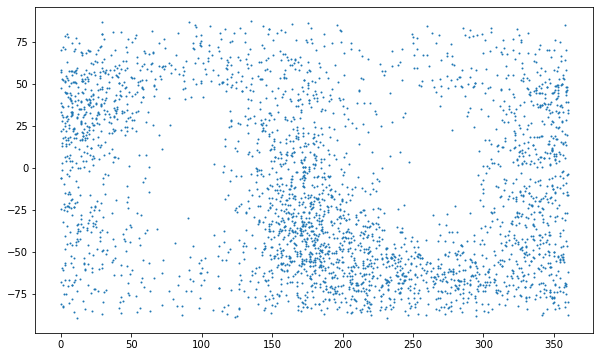

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(data['ra'], data['dec'], s=1)
plt.show()

In [ ]:
c1 = SkyCoord( # complete
c2 = # complete

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter( # complete
plt.show()

<b>Optional:</b> Plot the proper motions in multiple coordinate systems.

### Bonus 2: Custom coordinate systems

In [15]:
import coord_utils

# Choose two points that you want to lie along the equator
ra1, dec1 = (10.0, -10.0)
ra2, dec2 = (11.0, 80.0)

# Intermediate step - define pole
# pole = coord_utils.find_pole(ra1, dec1, ra2, dec2)

# Calculate euler angles
phi, theta, psi = coord_utils.euler_angles(ra1, dec1, ra2, dec2)

# Calculate rotation matrix to define coordinate system
R = coord_utils.create_matrix(phi, theta, psi)

R

array([[ 0.80632725,  0.14435328,  0.57358391],
       [ 0.5652457 ,  0.09749209, -0.81914138],
       [-0.17416564,  0.98471185, -0.00298454]])

<b>Optional:</b> Follow instructions here to create custom astropy coordinate frame from rotation matrix R
https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_sgr-coordinate-frame.html

<b>Alternative:</b> Use functions defined in coord_utils.py to convert ra, dec, pmra, pmdec using rotation matrix directly.


In [16]:
from coord_utils import phi12_rotmat, pmphi12, pmphi12_reflex

phi1, phi2 = phi12_rotmat(alpha=0., delta=0., R_phi12_radec=R)

print(phi1, phi2)

[35.03094611] [-10.03010716]


### Bonus 3: Define a custom coordinate system for the Nyx stream (data in Bonus 1). 

### Bonus 4: Look into incorporating uncertainties into astropy coordinate transformations.

Astropy has a new uncertainties subpackage in development. You can find the documentation <a href="https://docs.astropy.org/en/stable/uncertainty/index.html">here.</a> Test out this new subpackage and see if we can use it to propagate uncertainties through astropy coordinate transformations.

### Bonus 5: Check out the <a href="https://pyia.readthedocs.io/en/latest/#api">pyia</a> package and try propagating errors through coordinate conversion with error samples.

### Bonus 6: Look into code for transforming coordinates in Gaia data <a href="https://github.com/norashipp/coordinate_transformations_tutorial/blob/main/converting_code.py">here.</a>

Take a look at this code used to convert coordinates in Gaia DR2. This code will need to be updated to work with Gaia DR3.